In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run toi_2266.py

In [3]:
lpf = LPF('TOI-2266.01-joint-contaminated-a', m2_passbands=('r', 'i', 'z_s'), downsample=60)

In [4]:
lpf.set_prior('q1_tess', 'NP', 0.78, 0.02)
lpf.set_prior('q2_tess', 'NP', 0.77, 0.02)
lpf.set_prior('q1_g', 'NP', 0.64, 0.02)
lpf.set_prior('q2_g', 'NP', 0.64, 0.02)
lpf.set_prior('q1_r', 'NP', 0.65, 0.02)
lpf.set_prior('q2_r', 'NP', 0.59, 0.02)
lpf.set_prior('q1_i', 'NP', 0.75, 0.02)
lpf.set_prior('q2_i', 'NP', 0.72, 0.02)
lpf.set_prior('q1_z_s', 'NP', 0.79, 0.02)
lpf.set_prior('q2_z_s', 'NP', 0.78, 0.02)

In [5]:
lpf.ps

[  0 |G| tc             N(μ = 2459255.6937865, σ = 0.005)        [    -inf ..      inf],
   1 |G| p              N(μ = 2.326214, σ = 0.000223)            [    0.00 ..      inf],
   2 |G| rho            U(a = 20, b = 35)                        [    0.00 ..      inf],
   3 |G| b              U(a = 0.0, b = 1.0)                      [    0.00 ..     1.00],
   4 |P| k2_app         U(a = 0.0004, b = 0.0064)                [    0.00 ..      inf],
   5 |G| k2_true        U(a = 0.0004, b = 0.9025)                [    0.00 ..      inf],
   6 |G| teff_h         N(μ = 3200.0, σ = 160.0)                 [ 2500.00 .. 12000.00],
   7 |G| teff_c         U(a = 2500, b = 12000)                   [ 2500.00 .. 12000.00],
   8 |G| k2_app_tess    U(a = 0.0004, b = 0.0064)                [    0.00 ..      inf],
   9 |P| q1_tess        N(μ = 0.78, σ = 0.02)                    [    0.00 ..     1.00],
  10 |P| q2_tess        N(μ = 0.77, σ = 0.02)                    [    0.00 ..     1.00],
  11 |P| q1_g        

Global optimisation:   0%|          | 0/25000 [00:00<?, ?it/s]

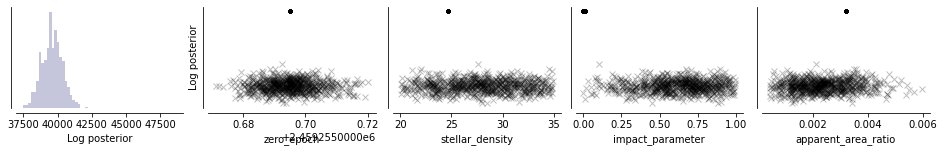

In [22]:
lpf.optimize_global(niter=25000, npop=800)

Global optimisation:   0%|          | 0/5000 [00:00<?, ?it/s]

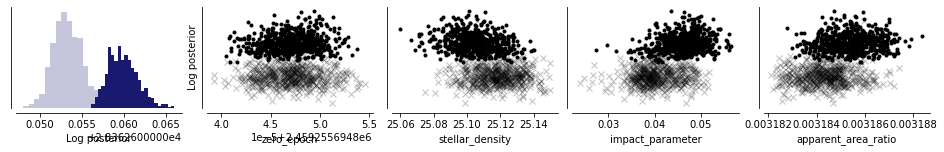

In [22]:
lpf.optimize_global(niter=5000, npop=600)

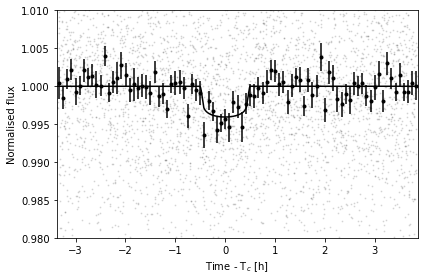

In [23]:
lpf.plot_folded_tess_transit(binwidth=5, ylim=(0.98, 1.01));

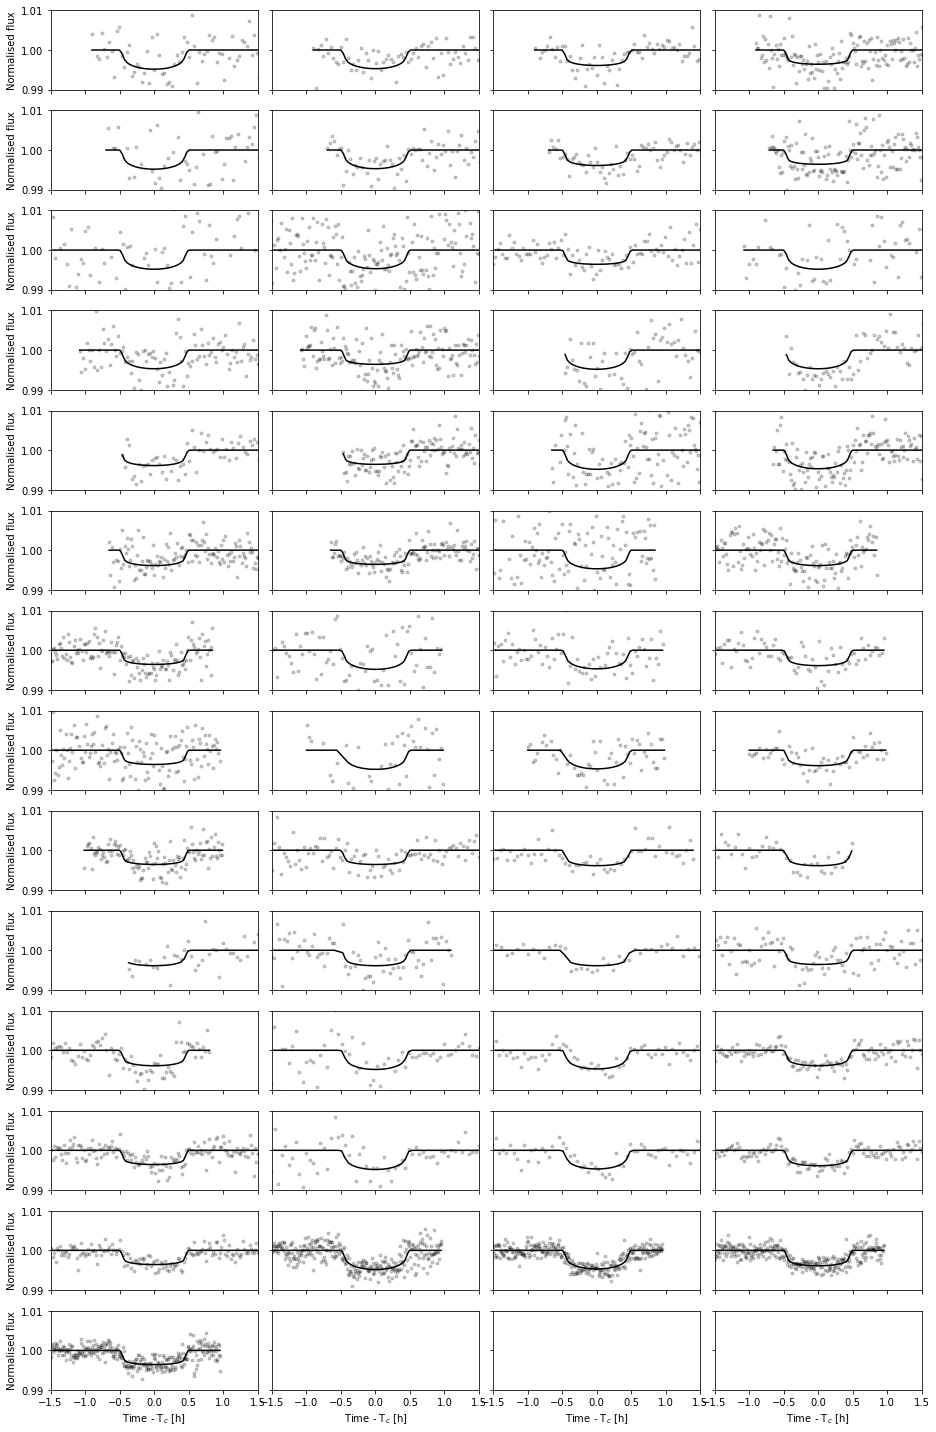

In [24]:
lpf.plot_gb_transits(figsize=(13,20), remove_baseline=True, xlim=(-1.5, 1.5), ylim=(0.99, 1.01));

In [33]:
lpf.sample_mcmc(5000, thin=100, repeats=6)

MCMC sampling:   0%|          | 0/6 [00:00<?, ?it/s]

Run 1/6:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 2/6:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 3/6:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 4/6:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 5/6:   0%|          | 0/5000 [00:00<?, ?it/s]

Run 6/6:   0%|          | 0/5000 [00:00<?, ?it/s]

In [34]:
lpf.save()

In [35]:
lpf.sample_mcmc(25000, thin=250, repeats=1)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/25000 [00:00<?, ?it/s]

In [36]:
lpf.save()

In [37]:
lpf.sample_mcmc(25000, thin=250, repeats=1)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/25000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
lpf.save()

In [27]:
df = lpf.posterior_samples()

In [28]:
from corner import corner

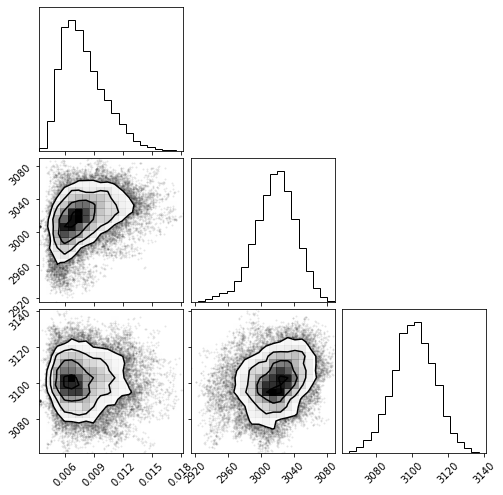

In [29]:
corner(df[['k2_true', 'teff_c', 'teff_h']]);

<AxesSubplot:>

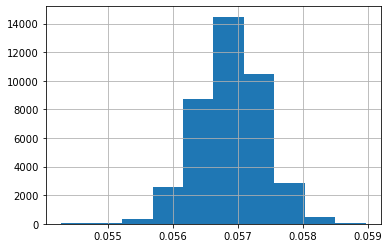

In [30]:
sqrt(df.k2_app).hist()

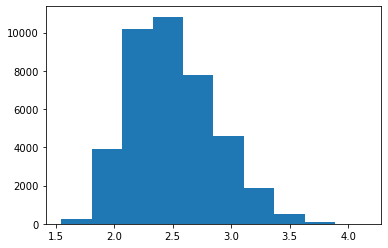

In [31]:
rs = normal(star_r.n, star_r.s, size=df.shape[0])
rp = sqrt(df.k2_true.values) * rs * (1*u.R_sun).to(u.R_earth).value
hist(rp);

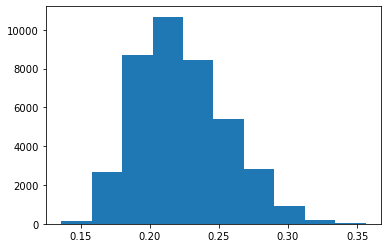

In [32]:
rs = normal(star_r.n, star_r.s, size=df.shape[0])
rp = sqrt(df.k2_true.values) * rs * (1*u.R_sun).to(u.R_jup).value
hist(rp);